In [2]:
import pandas as pd
import requests
import io

# URL for the iris dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"

try:
    # Download the content of the CSV file
    response = requests.get(url)
    response.raise_for_status() # Raise an exception for bad status codes

    # Read the content into a pandas DataFrame
    df = pd.read_csv(io.StringIO(response.text))
    print("Successfully loaded iris.csv from URL.")
except requests.exceptions.RequestException as e:
    print(f"Error downloading iris.csv: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

df.head()

Successfully loaded iris.csv from URL.


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
# Look at first 5 rows
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# Shape of the dataset (rows, columns)
print("Shape of dataset:", df.shape)

# Column names
print("\nColumn names:", df.columns.tolist())

# Info about data types and null values
print("\nInfo:")
print(df.info())

# Statistical summary of numerical columns
print("\nStatistical summary:")
print(df.describe())

# Unique species
print("\nUnique species:")
print(df["species"].unique())

# Count of each species
print("\nCount of each species:")
print(df["species"].value_counts())

Shape of dataset: (150, 5)

Column names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Statistical summary:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000 

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


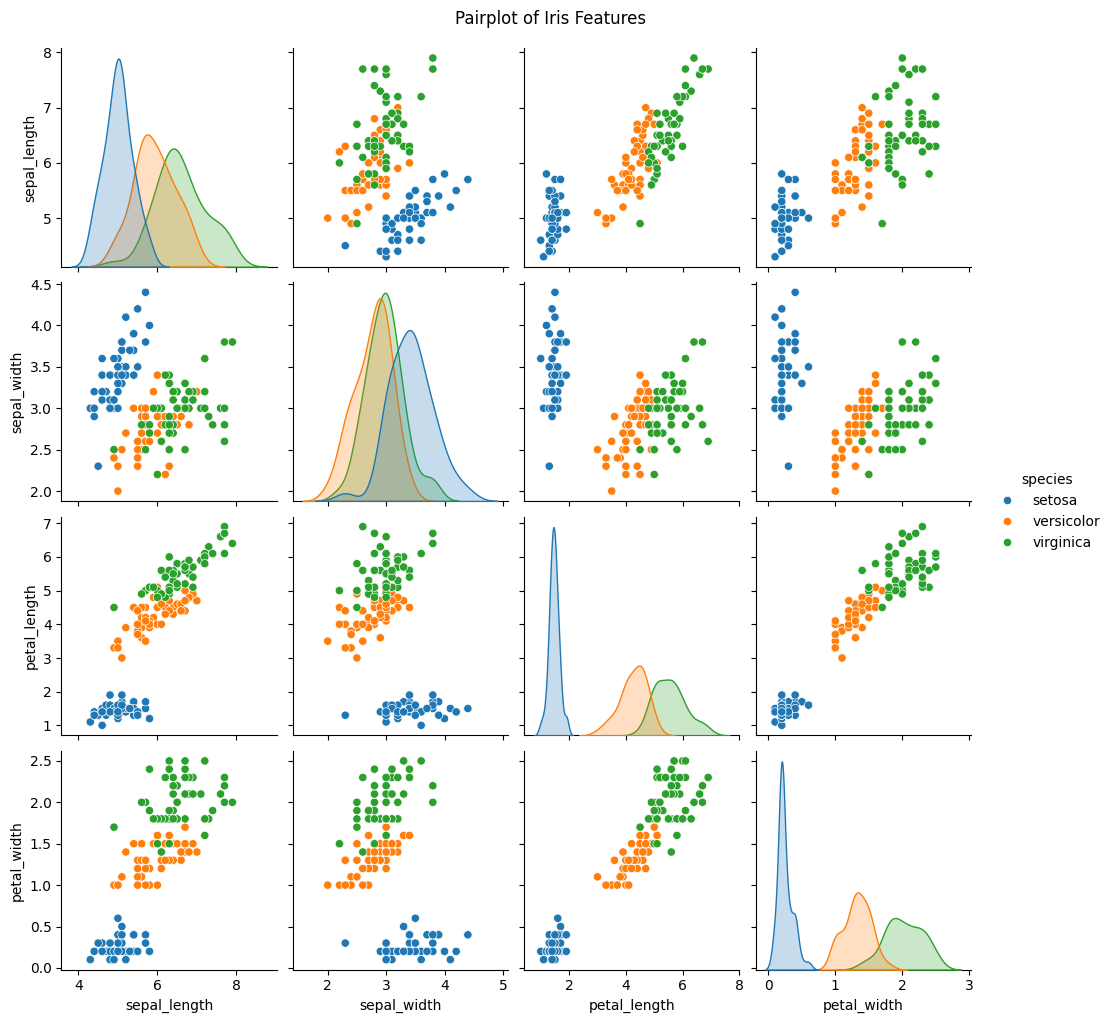

In [12]:
sns.pairplot(df, hue="species")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

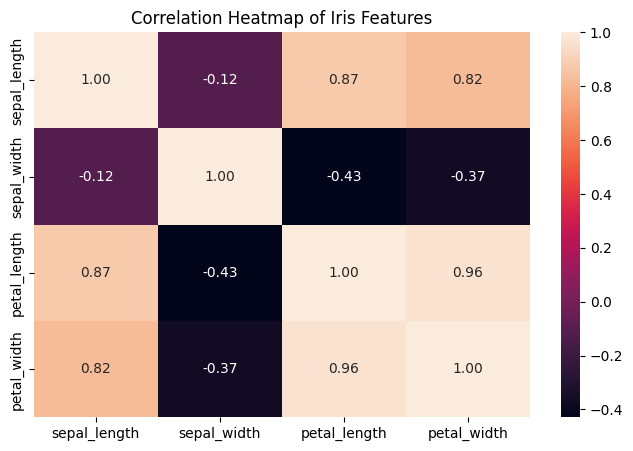

In [13]:
plt.figure(figsize=(8, 5))
corr = df.drop("species", axis=1).corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Iris Features")
plt.show()


<Figure size 1000x600 with 0 Axes>

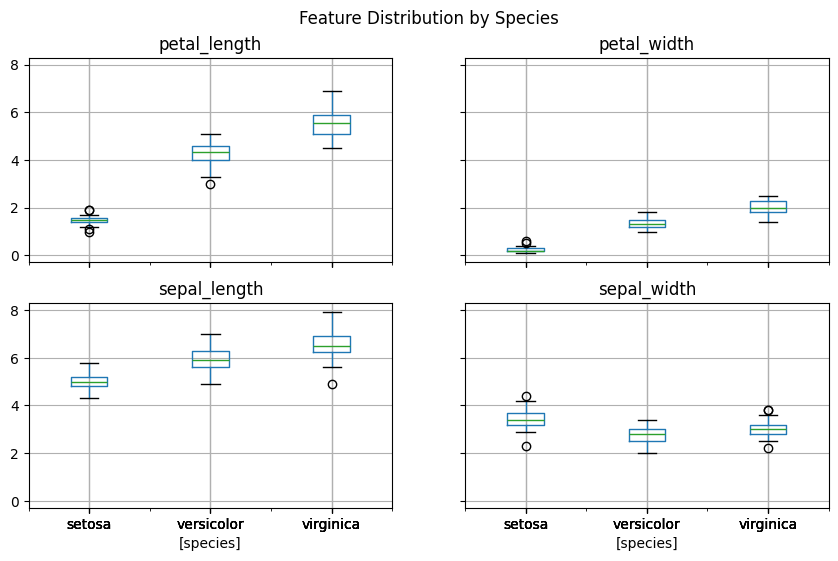

In [14]:
plt.figure(figsize=(10, 6))
df.boxplot(by="species", figsize=(10,6))
plt.suptitle("Feature Distribution by Species")
plt.show()

In [15]:
# Features (independent variables)
X = df.drop("species", axis=1)

# Target (dependent variable)
y = df["species"]

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (150, 4)
Target vector shape: (150,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 120
Test set size: 30


In [18]:
# Creating the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Training the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
# Predicting on test data
y_pred = knn_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy of KNN model:", acc)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy of KNN model: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



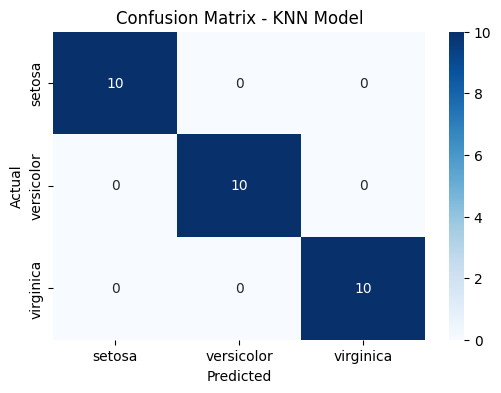

In [20]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=df["species"].unique(),
            yticklabels=df["species"].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN Model")
plt.show()

In [21]:
# Example new flower measurement
# [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]
new_sample = np.array([[5.0, 3.4, 1.5, 0.2]])

# Reshape to (1, -1) just to be safe
prediction = knn_model.predict(new_sample)

print("Predicted species for sample", new_sample[0], "is:", prediction[0])

Predicted species for sample [5.  3.4 1.5 0.2] is: setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [22]:

from sklearn.svm import SVC

svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("Accuracy of SVM model:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy of SVM model: 1.0

SVM Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [23]:
# ### ✅ Conclusion

# In this project, I worked on the Iris Flower Classification task as part of my AICTE Oasis Infobyte internship.

# I used the Iris dataset containing sepal length, sepal width, petal length, and petal width for three species: *Iris-setosa, Iris-versicolor,* and *Iris-virginica*. I performed data exploration, visualizations (pairplot, heatmap, boxplots), and then built a classification model using the K-Nearest Neighbors (KNN) algorithm.

# After splitting the data into training and testing sets, the model achieved a high accuracy on the test data and was able to correctly predict the species of iris flowers based on their measurements. I also experimented with an SVM model for comparison.

# This task helped me understand the complete machine learning workflow: loading data, preprocessing, EDA, model training, evaluation, and making predictions on new data.

